 Importing The Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sms
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

Data Collection And Analysis

In [6]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset=pd.read_csv("C:\\Users\\aishu\\OneDrive\\Documents\\datasets_13720_18513_insurance(1).csv")

In [7]:
# First 5 rows of the DataFrame
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
# number of rows and columns 
insurance_dataset.shape

(1338, 7)

In [19]:
# getting some information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


categorical Features:

1.Sex

2.Smoker

3.Region

In [20]:
# Checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

 Data Analysis

In [21]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\aishu\AppData\Local\Temp\ipykernel_9176\1287054486.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sms.distplot(insurance_dataset['age'])


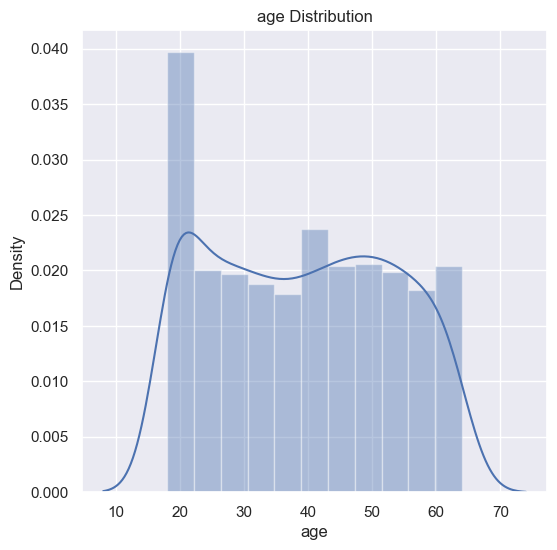

In [22]:
# distribution of the age value
sms.set()
plt.figure(figsize=(6,6))
sms.distplot(insurance_dataset['age'])
plt.title('age Distribution')
plt.show()

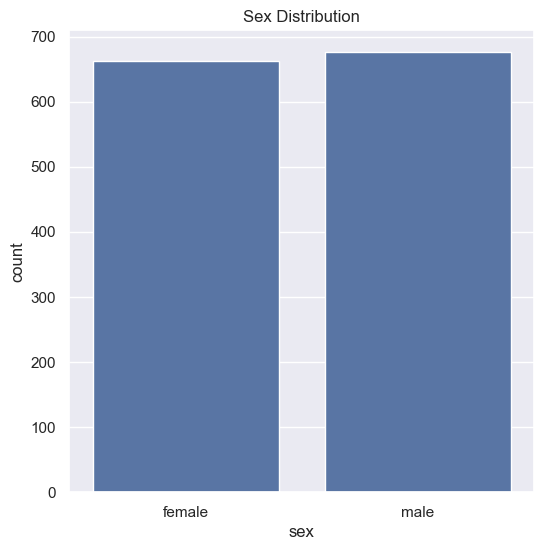

In [23]:
# gender column 
plt.figure(figsize=(6,6))
sms.countplot(x='sex',data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [24]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\aishu\AppData\Local\Temp\ipykernel_9176\2771020481.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sms.distplot(insurance_dataset['bmi'])


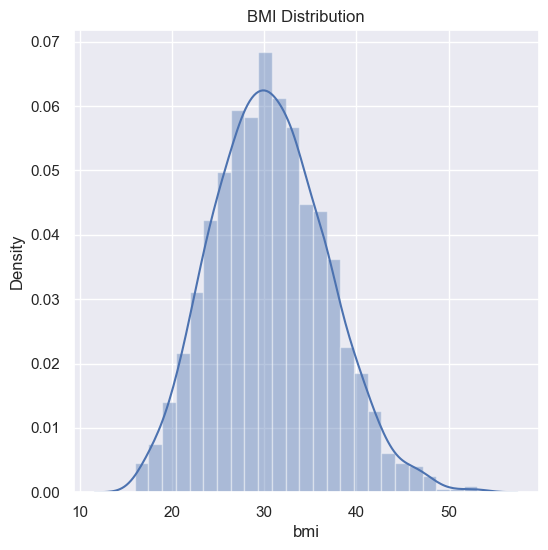

In [25]:
# BMI distribution
plt.figure(figsize=(6,6))
sms.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

In [26]:
# Normal BMI range --> 18.5 to 24.9

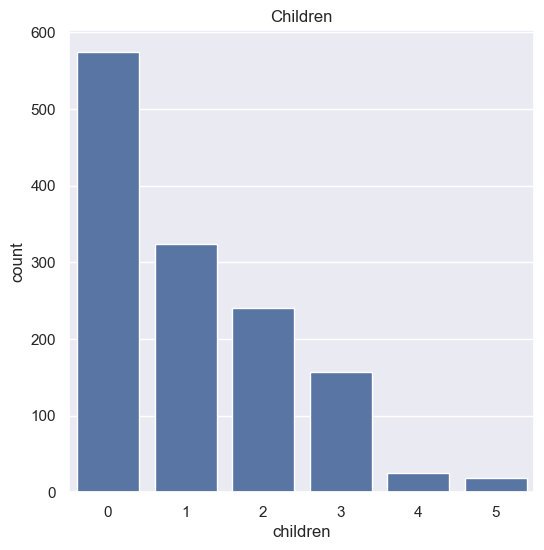

In [27]:
# Children column 
plt.figure(figsize=(6,6))
sms.countplot(x='children',data=insurance_dataset)
plt.title('Children')
plt.show()

In [28]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

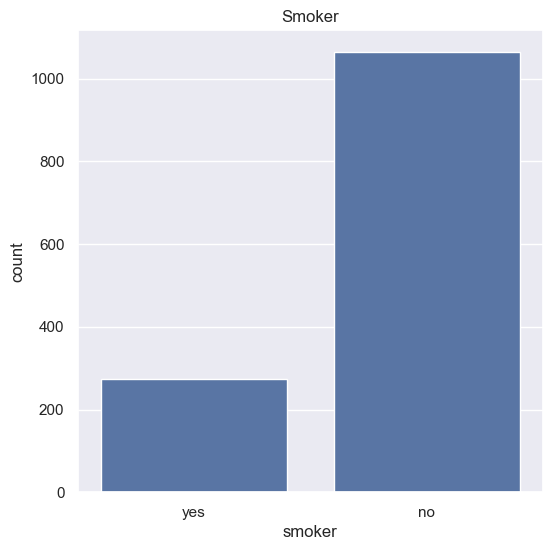

In [29]:
# Smoker column
plt.figure(figsize=(6,6))
sms.countplot(x='smoker',data=insurance_dataset)
plt.title('Smoker')
plt.show()

In [30]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

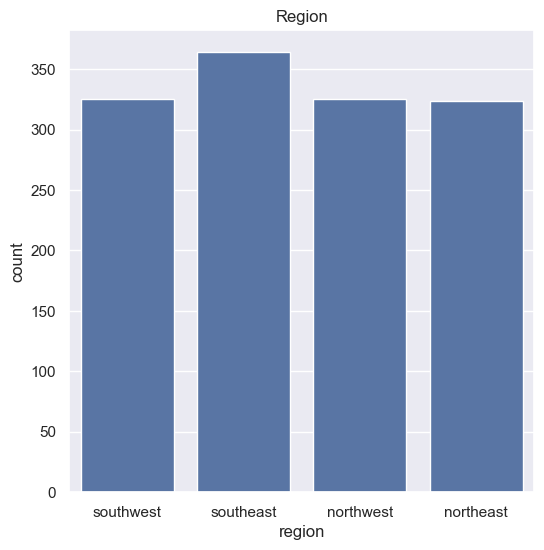

In [31]:
# region column
plt.figure(figsize=(6,6))
sms.countplot(x='region',data=insurance_dataset)
plt.title('Region')
plt.show()

In [32]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\aishu\AppData\Local\Temp\ipykernel_9176\1455965077.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sms.distplot(insurance_dataset['charges'])


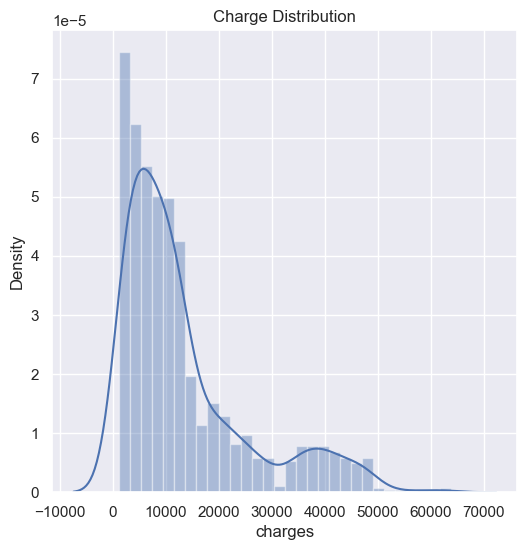

In [33]:
# distribution of charges value
plt.figure(figsize=(6,6))
sms.distplot(insurance_dataset['charges'])
plt.title('Charge Distribution')
plt.show()

Data Preprocessing


Encoding the categorical features

In [34]:
# encoding sex column

insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)

# encoding smoker column

insurance_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

# encoding region column

insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2,'northwest':3}}, inplace=True)

C:\Users\aishu\AppData\Local\Temp\ipykernel_9176\1319339659.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)
C:\Users\aishu\AppData\Local\Temp\ipykernel_9176\1319339659.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)
C:\Users\aishu\AppData\Local\Temp\ipykernel_9176\1319339659.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version.

Splitting the Features and Target

In [35]:
x = insurance_dataset.drop(columns='charges', axis=1)
y = insurance_dataset['charges']

In [36]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [37]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into Training data and Testing data

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [39]:
print(x.shape, x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression

In [40]:
# loading the Linear Regression Model
regressor = LinearRegression()

In [41]:
regressor.fit(x_train, y_train)

LinearRegression()

Model Evaluation

In [89]:
# prediction of training data 
training_data_prediction = regressor.predict(x_train)

In [95]:
# R squared value 
r2_train = metrics.r2_score(y_train, training_data_prediction)
print(f'R squared value : {r2_train:.2f}')

R squared value : 0.75


In [96]:
# mean_squared_error
lr_mse = mean_squared_error(y_train, training_data_prediction)
print(f"MSE: {lr_mse:.2f}")

MSE: 36174978.43


In [97]:
# mean_absolute_error
lr_mae = mean_absolute_error(y_train, training_data_prediction)
print(f"MAE: {lr_mae:.2f}")

MAE: 4150.50


In [98]:
# prediction of testing data 
testing_data_prediction = regressor.predict(x_test)

In [99]:
# R squared value 
r2_test = metrics.r2_score(y_test, testing_data_prediction)
print(f'R squared value :{r2_test:.2f}')

R squared value :0.74


In [100]:
# mean_squared_error
lr_mse = mean_squared_error(y_test, testing_data_prediction)
print(f"MSE: {lr_mse:.2f}")

MSE: 38337035.49


In [101]:
lr_mae = mean_absolute_error(y_test, testing_data_prediction)
print(f"MAE: {lr_mae:.2f}")

MAE: 4267.21


KNN model

In [87]:
knn_model = KNeighborsRegressor(n_neighbors=5)

In [52]:
knn_model.fit(x_train,y_train)

KNeighborsRegressor()

In [53]:
knn_pred = knn_model.predict(x_train)
knn_mse = mean_squared_error(y_train, knn_pred)
knn_mae = mean_absolute_error(y_train, knn_pred)
knn_r2 = r2_score(y_train, knn_pred)
print("KNN Regressor Metrics:")
print(f"MSE: {knn_mse:.2f}")
print(f"MAE: {knn_mae:.2f}")
print(f"R2 Score: {knn_r2:.2f}")

KNN Regressor Metrics:
MSE: 87745949.45
MAE: 6410.76
R2 Score: 0.40


In [54]:
knn_pred = knn_model.predict(x_test)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_mae = mean_absolute_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)
print("KNN Regressor Metrics:")
print(f"MSE: {knn_mse:.2f}")
print(f"MAE: {knn_mae:.2f}")
print(f"R2 Score: {knn_r2:.2f}")

KNN Regressor Metrics:
MSE: 144311549.99
MAE: 8602.47
R2 Score: 0.04


Random Forest Regressor

In [55]:
rf_model =  RandomForestRegressor(n_estimators=100, random_state=2)

In [56]:
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=2)

In [57]:
rf_pred = rf_model.predict(x_train)
rf_mse = mean_squared_error(y_train, rf_pred)
rf_mae = mean_absolute_error(y_train, rf_pred)
rf_r2 = r2_score(y_train, rf_pred)
print("Random Forest Regressor Metrics:")
print(f"MSE: {rf_mse:.2f}")
print(f"MAE: {rf_mae:.2f}")
print(f"R2 Score: {rf_r2:.2f}")

Random Forest Regressor Metrics:
MSE: 3304109.77
MAE: 1016.64
R2 Score: 0.98


In [58]:
rf_pred = rf_model.predict(x_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print("Random Forest Regressor Metrics:")
print(f"MSE: {rf_mse:.2f}")
print(f"MAE: {rf_mae:.2f}")
print(f"R2 Score: {rf_r2:.2f}")

Random Forest Regressor Metrics:
MSE: 24482237.31
MAE: 2795.39
R2 Score: 0.84


Decision Tree Regressor Model

In [59]:
dt_model = DecisionTreeRegressor(random_state=2)

In [60]:
dt_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=2)

In [61]:
dt_pred = dt_model.predict(x_train)
dt_mse = mean_squared_error(y_train, dt_pred)
dt_mae = mean_absolute_error(y_train, dt_pred)
dt_r2 = r2_score(y_train, dt_pred)
print("Decision Tree Regressor Metrics:")
print(f"MSE: {dt_mse:.2f}")
print(f"MAE: {dt_mae:.2f}")
print(f"R2 Score: {dt_r2:.2f}")

Decision Tree Regressor Metrics:
MSE: 0.00
MAE: 0.00
R2 Score: 1.00


In [62]:
dt_pred = dt_model.predict(x_test)
dt_mse = mean_squared_error(y_test, dt_pred)
dt_mae = mean_absolute_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
print("Decision Tree Regressor Metrics:")
print(f"MSE: {dt_mse:.2f}")
print(f"MAE: {dt_mae:.2f}")
print(f"R2 Score: {dt_r2:.2f}")

Decision Tree Regressor Metrics:
MSE: 47208473.95
MAE: 3367.69
R2 Score: 0.69


Support Vector Regressor (SVR) Model

In [63]:
svr_model = SVR(kernel='rbf', C=1e3, gamma=0.1)

In [64]:
svr_model.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [65]:
svr_pred = svr_model.predict(x_train)
svr_mse = mean_squared_error(y_train, svr_pred)
svr_mae = mean_absolute_error(y_train, svr_pred)
svr_r2 = r2_score(y_train, svr_pred)
print("SVR Metrics:")
print(f"MSE: {svr_mse:.2f}")
print(f"MAE: {svr_mae:.2f}")
print(f"R2 Score: {svr_r2:.2f}")

SVR Metrics:
MSE: 154850618.33
MAE: 6200.72
R2 Score: -0.06


In [66]:
svr_pred = svr_model.predict(x_test)
svr_mse = mean_squared_error(y_test, svr_pred)
svr_mae = mean_absolute_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)
print("SVR Metrics:")
print(f"MSE: {svr_mse:.2f}")
print(f"MAE: {svr_mae:.2f}")
print(f"R2 Score: {svr_r2:.2f}")

SVR Metrics:
MSE: 158091009.50
MAE: 6444.29
R2 Score: -0.05


Building a predictive system 

In [67]:
input_data = (1,25,74,0,1,0)

# changing input data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)

# reshape the array 

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

[12801.73264143]


C:\Users\aishu\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [68]:
input_data = (1,25,74,0,1,0)

# changing input data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)

# reshape the array 

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = knn_model.predict(input_data_reshaped)
print(prediction)

[17889.23378]


C:\Users\aishu\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [69]:
input_data = (1,25,74,0,1,0)

# changing input data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)

# reshape the array 

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = svr_model.predict(input_data_reshaped)
print(prediction)

[8304.47630838]


C:\Users\aishu\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [70]:
input_data = (19,1,27.900,0,0,1)

# changing input data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)

# reshape the array 

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = dt_model.predict(input_data_reshaped)
print(prediction)

[16884.924]


C:\Users\aishu\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [71]:
input_data = (19,1,27.900,0,0,1)
# changing input data to a numpy array

input_data_as_numpy_array = np.asarray(input_data)

# reshape the array 

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf_model.predict(input_data_reshaped)
print(prediction)

[16989.1277063]


C:\Users\aishu\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## MODEL COMPARISION

 __Modelling and Evaluation__
 
__a) Models Used__

*	Linear Regression (LR)
*	K-Nearest Neighbors (KNN)
*	Random Forest (RF)
*	Decision Tree (DT)
*	Support Vector Regression (SVR)

__b) Model Performance__

*	Evaluated using metrics:
*	Mean Absolute Error (MAE)
*	Mean Squared Error (MSE)
*	R² Score



## Compared models to identify the best-performing approach.

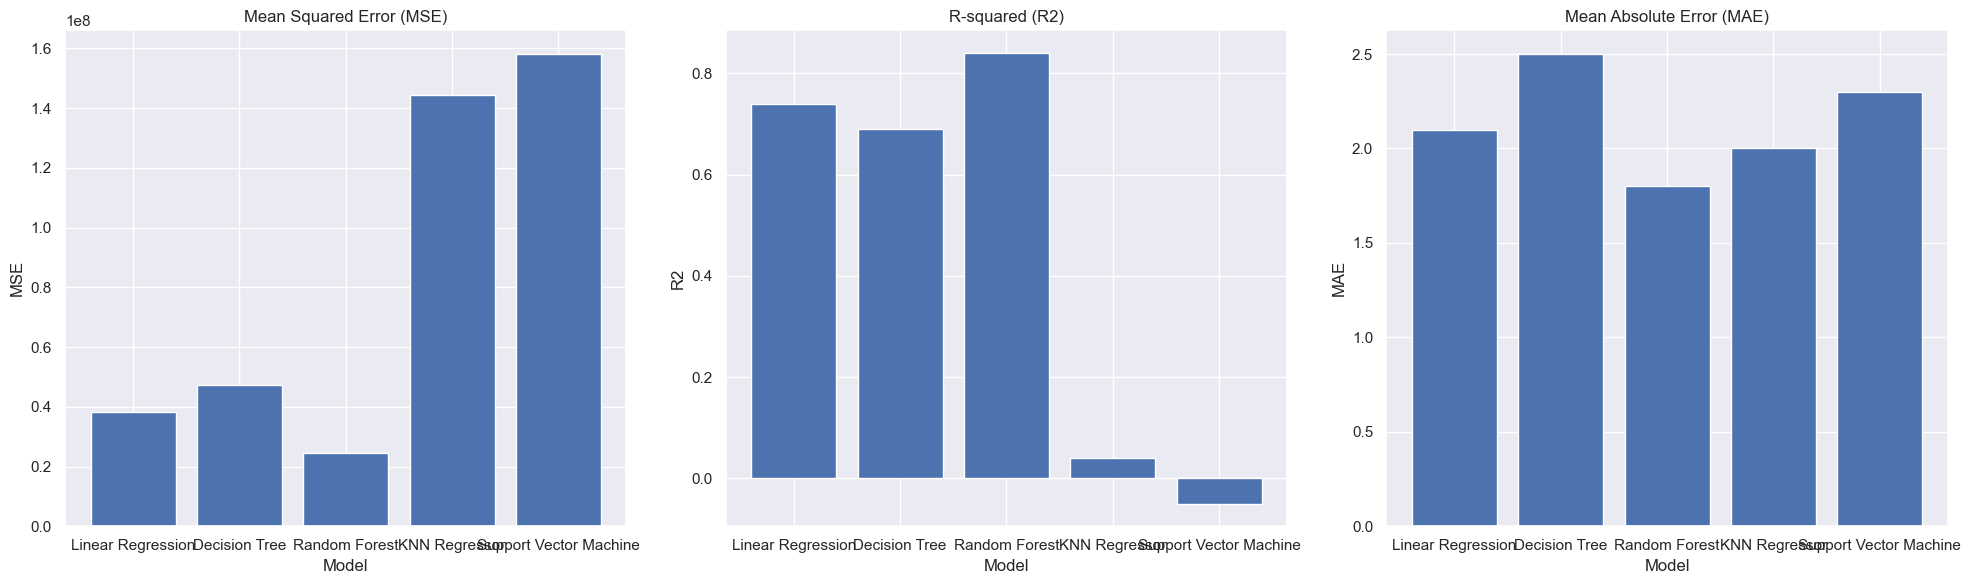

In [103]:
# Define the model names
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'KNN Regressor', 'Support Vector Machine']

# Define the evaluation metrics for each model
mse_values = [38337035.49,47208473.95,24482237.31,144311549.99,158091009.50]
r2_values = [0.74,0.69,0.84,0.04,-0.05]
mae_values = [4267.21,3367.69,]

# Create a figure and axis object
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

# Plot the MSE values
ax[0].bar(model_names, mse_values)
ax[0].set_title('Mean Squared Error (MSE)')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('MSE')

# Plot the R2 values
ax[1].bar(model_names, r2_values)
ax[1].set_title('R-squared (R2)')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('R2')

# Plot the MAE values
ax[2].bar(model_names, mae_values)
ax[2].set_title('Mean Absolute Error (MAE)')
ax[2].set_xlabel('Model')
ax[2].set_ylabel('MAE')

# Layout so plots do not overlap
fig.tight_layout()

# Display the plot
plt.show()

In [ ]:
KNN Regressor Metrics:
MSE: 144311549.99
MAE: 8602.47
R2 Score: 0.04
SVR Metrics:
MSE: 158091009.50
MAE: 6444.29
R2 Score: -0.05
Random Forest Regressor Metrics:
MSE: 24482237.31
MAE: 2795.39
R2 Score: 0.84
# mean_squared_error
lr_mse = mean_squared_error(y_test, testing_data_prediction)
print(f"MSE: {lr_mse:.2f}")
MSE: 38337035.49
lr_mae = mean_absolute_error(y_test, testing_data_prediction)
print(f"MAE: {lr_mae:.2f}")
MAE: 4267.21
Decision Tree Regressor Metrics:
MSE: 47208473.95
MAE: 3367.69
R2 Score: 0.69

## Report on challenges Faced

__1.	Data Quality and Preprocessing__

*	Handling missing values to prevent data gaps.
*	Encoding categorical variables like 'sex' and 'smoker'.

__2.	Model Selection and Performance Variability__

*	Comparing regression models to find the best fit.
*	Hyperparameter tuning challenges, especially for complex models.

__3.	Overfitting and Underfitting Issues__

*	Decision Trees and Random Forests risk overfitting.
*	Linear Regression may underfit due to its simplicity.

__4.	Real-World Application Challenges__

*	Handling outliers (e.g., extremely high medical costs).
*	Ethical concerns regarding bias in demographic-based predictions.

